In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
print("Initial Data:")
display(df.head())

Initial Data:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
# Get basic information about the dataset
print("\nData Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [5]:
# Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [6]:
df.columns = df.columns.str.strip()
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print(df['Date'])

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
262   2020-06-30
263   2020-07-31
264   2020-08-31
265   2020-09-30
266   2020-10-31
Name: Date, Length: 267, dtype: datetime64[ns]


In [13]:
# Calculating average unemployment rate by region
avg_unemployment_by_region = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print("\nAverage Unemployment Rate by Region:")
print(avg_unemployment_by_region)


Average Unemployment Rate by Region:
Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name: Estimated Unemployment Rate (%), dtype: float64


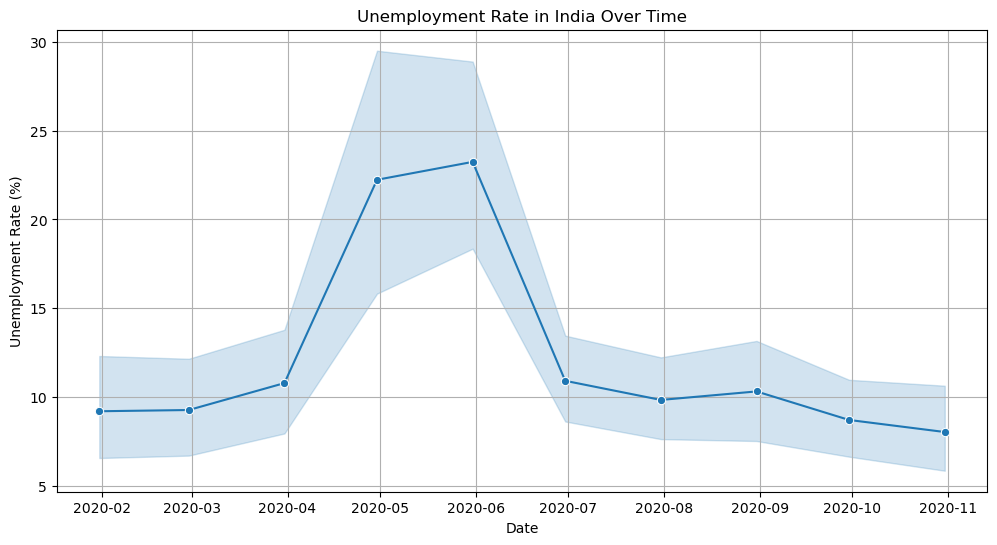

In [15]:
# Plotting the unemployment rate over time for the entire dataset
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

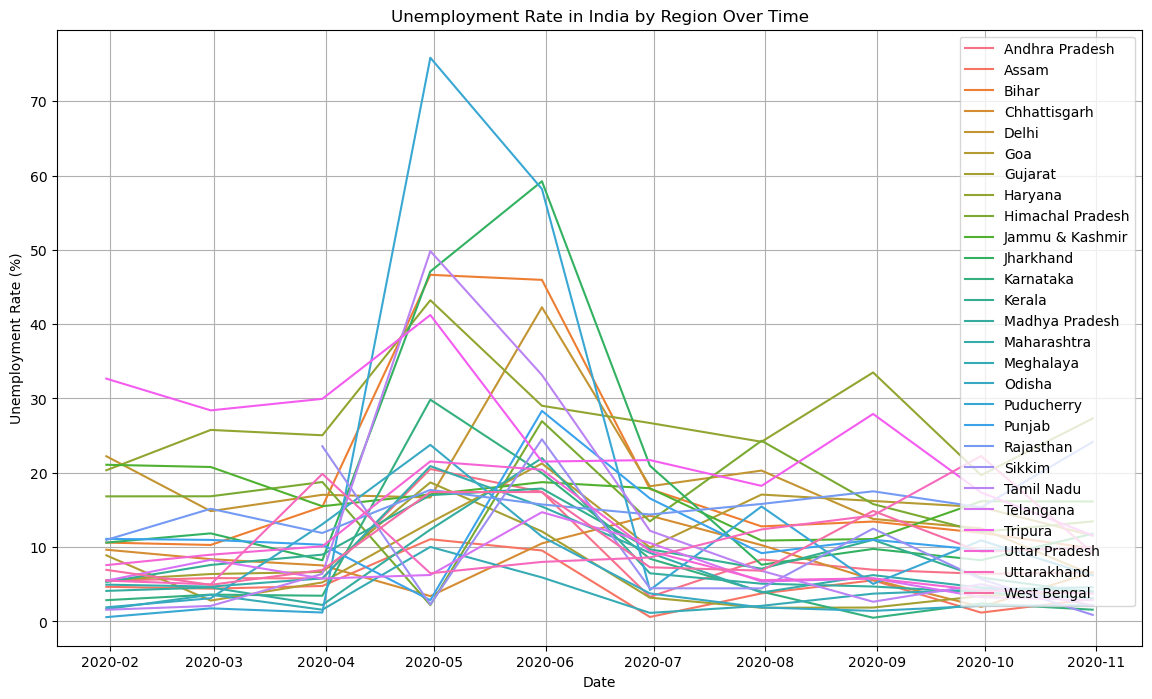

In [16]:
# Plot unemployment rate by state/region if the data contains such information
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate in India by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

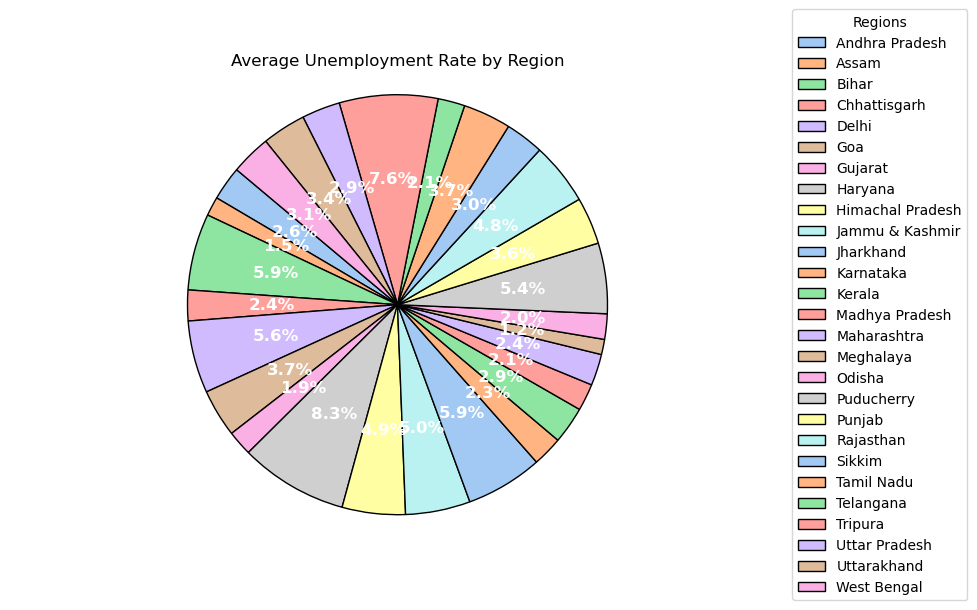

In [19]:
# Pie chart showing average unemployment rate by region
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[0:len(avg_unemployment_by_region)]
wedges, texts, autotexts = plt.pie(avg_unemployment_by_region, autopct='%1.1f%%', \
                                   startangle=140, colors=colors, \
                                   wedgeprops={'edgecolor': 'black'})

# Add a legend
plt.legend(wedges, avg_unemployment_by_region.index, title="Regions", \
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Improve the layout of the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

plt.title('Average Unemployment Rate by Region')
plt.axis('equal') 
plt.show()

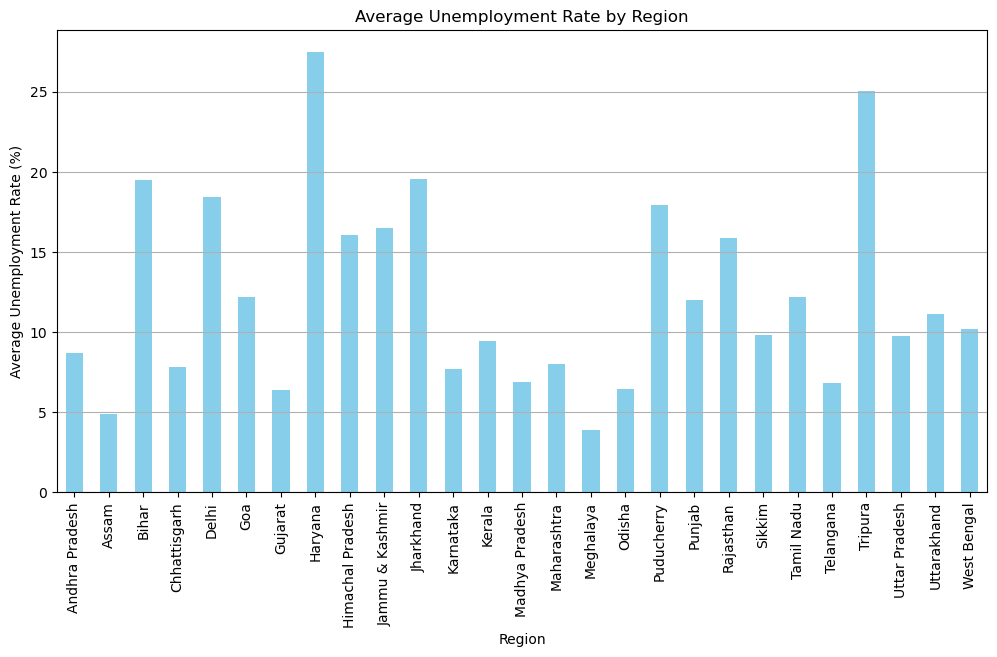

In [20]:
# Bar plot showing average unemployment rate by region
plt.figure(figsize=(12, 6))
avg_unemployment_by_region.plot.bar(color='skyblue')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(axis='y')
plt.show()

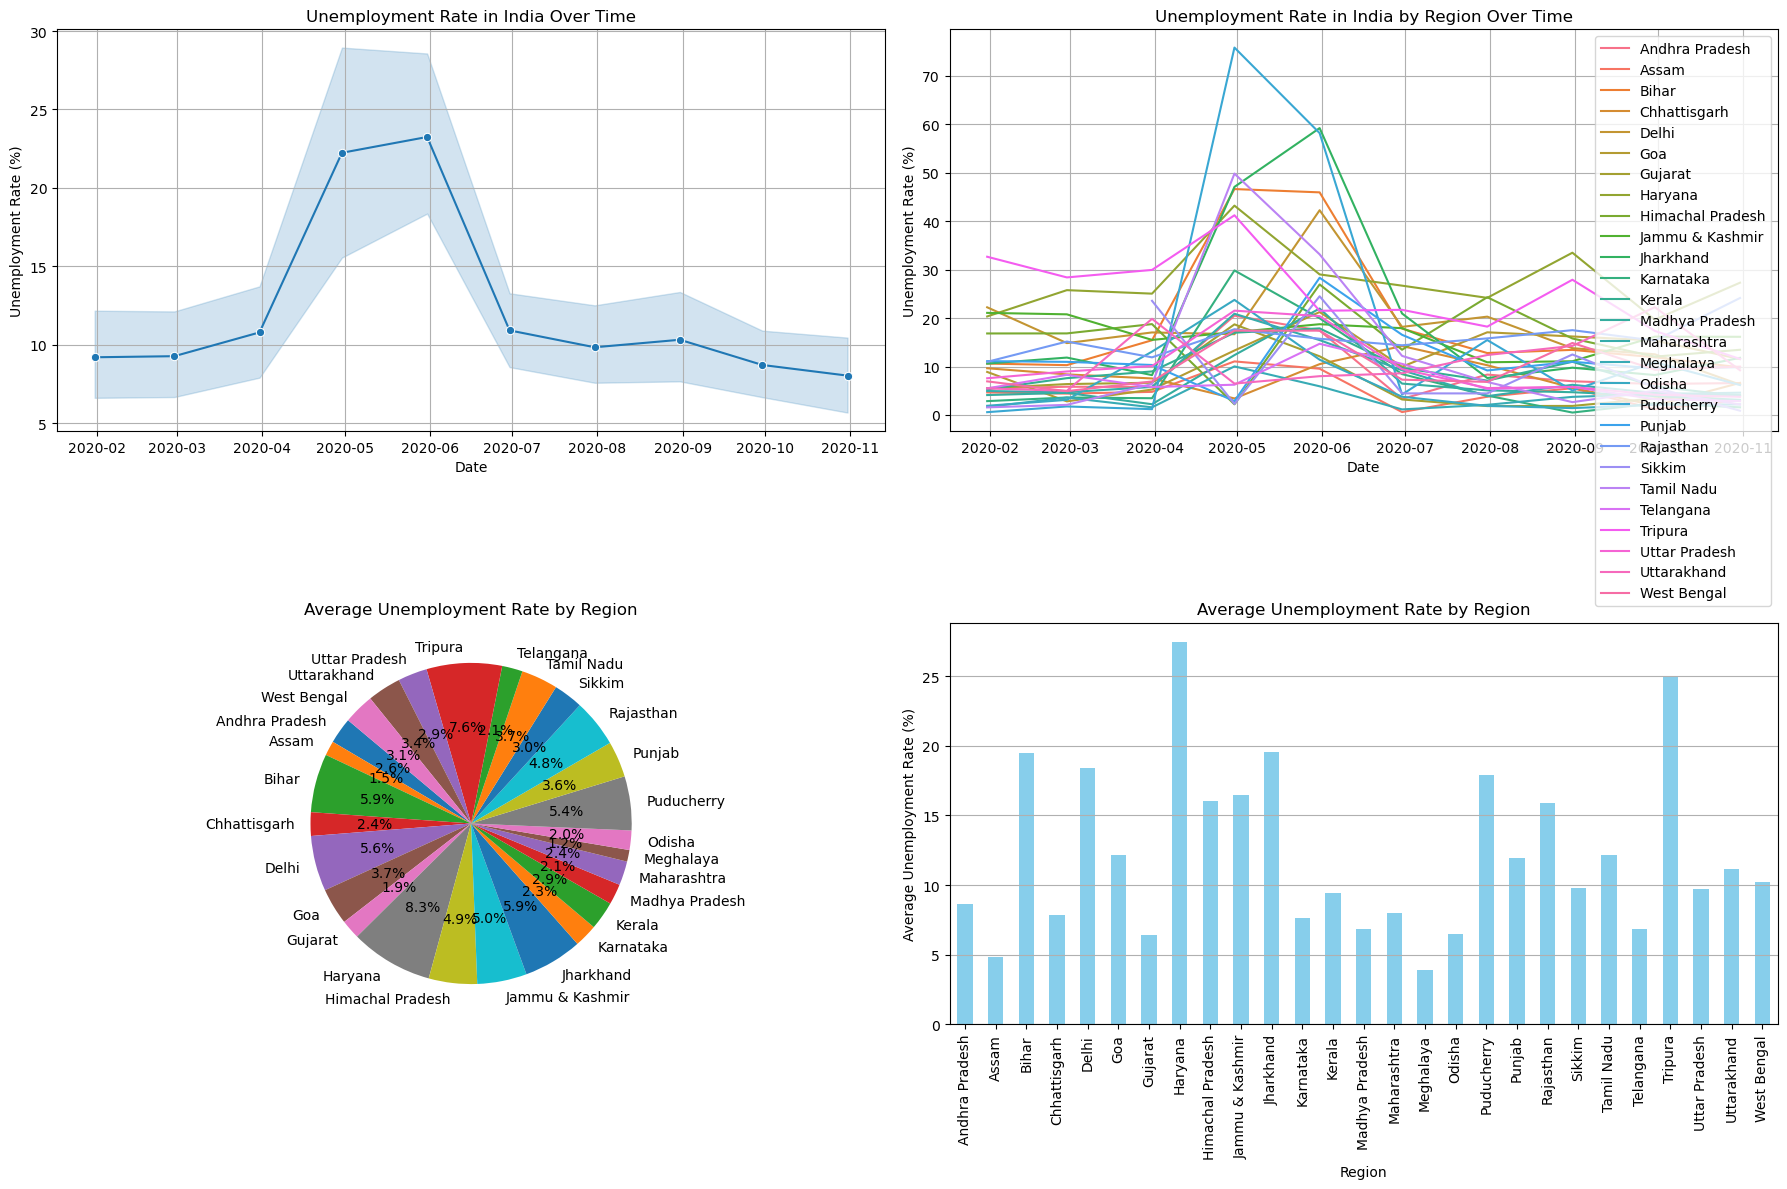

In [24]:
# Dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Unemployment rate over time
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Unemployment Rate in India Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Unemployment Rate (%)')
axes[0, 0].grid(True)

# Unemployment rate by region over time
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', ax=axes[0, 1])
axes[0, 1].set_title('Unemployment Rate in India by Region Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Unemployment Rate (%)')
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(True)

# Pie chart of average unemployment rate by region
avg_unemployment_by_region.plot.pie(autopct='%1.1f%%', startangle=140, ax=axes[1, 0])
axes[1, 0].set_title('Average Unemployment Rate by Region')
axes[1, 0].set_ylabel('')

# Bar plot of average unemployment rate by region
avg_unemployment_by_region.plot.bar(color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Average Unemployment Rate by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Average Unemployment Rate (%)')
axes[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()